In [1]:
# from clean_photometry import *
from phot_cull8 import *

In [2]:
# Read all data
input_data,output_data  = read_data(filename='10_10_phot.txt',
                                    filters=filters)

In [3]:
'''
Prepare the data for classification. The output data is now cleaned 
to exclude low information entries and also labeled based on location 
of detection.

Return 3 arrays ordered by corresponding filternames:
- First array for input data in pandas data frames
- Second array for cleaned output data in pandas data frames
- Third array for labels of output data in numpy arrays
'''
in_DF,out_DF,out_LAB    = prep_data(input_data,output_data)

In [4]:
# Initiate classifier
clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=50,
                             min_samples_leaf=10)

In [ ]:
# Ensemble tree classifiers to try
'''
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf1 = RandomForestClassifier(n_estimators=100,n_jobs=-1,
      max_depth=10,min_samples_split=200, min_samples_leaf=100)
      
clf2 = AdaBoostClassifier(base_estimator=clf,
                        n_estimators=50,
                        random_state=int(np.ceil(time.time())))
'''

In [5]:
# Example for 1 filter

# Extract features and label
features = out_DF[0][feature_names]
labels   = out_LAB[0]
filt = filters[0]

# Split into training and testing datasets
train_F,test_F,train_L,test_L = train_test_split(features,labels,test_size=0.9)

# Train and predict
clf.fit(train_F,train_L)
pred_L = clf.predict(test_F)

# Evaluate the model
print_report(filt,test_L,pred_L,feature_names,
             clf.feature_importances_)


Band Z087 feature importance:
err:	0.781
SNR:	0.000
Sharpness:	0.009
Crowding:	0.210

 Precision:	0.77
 Recall:	0.73 (Sensitivity)
 Specificity:	0.88





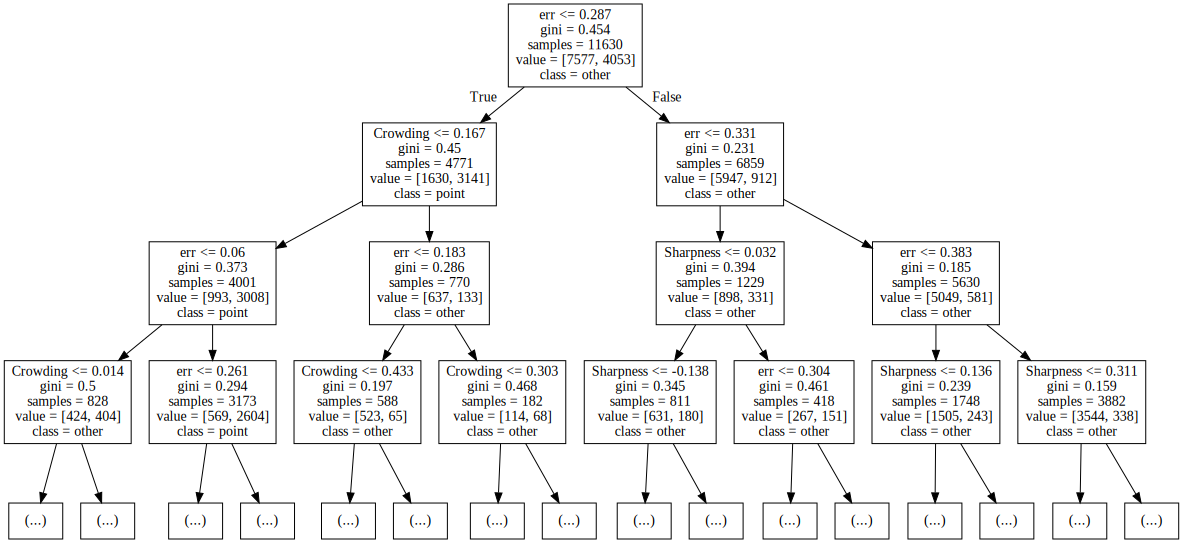

In [6]:
# Ensure that the "tree" is reasonable
dot_data = export_graphviz(clf, out_file=None,
                           leaves_parallel=True,
                           feature_names=feature_names,
                           class_names=['other','point'],
                           max_depth=3)
graph = graphviz.Source(dot_data)
graph

In [7]:
# Relabel the data for qualitative evaluation
_new_labels = clf.predict(features)

In [8]:
# For all filters
new_labels = classify(out_DF,out_LAB,
                      clf=clf,
                      test_size=0.9,
                      opt={'evaluate':False,
                           'summary':True,
                           'tree':False})


Band Z087 feature importance:
err:	0.697
SNR:	0.075
Sharpness:	0.005
Crowding:	0.224

 Precision:	0.77
 Recall:	0.73 (Sensitivity)
 Specificity:	0.88




Band Y106 feature importance:
err:	0.694
SNR:	0.046
Sharpness:	0.029
Crowding:	0.230

 Precision:	0.79
 Recall:	0.73 (Sensitivity)
 Specificity:	0.90




Band J129 feature importance:
err:	0.619
SNR:	0.073
Sharpness:	0.058
Crowding:	0.249

 Precision:	0.77
 Recall:	0.73 (Sensitivity)
 Specificity:	0.89




Band H158 feature importance:
err:	0.594
SNR:	0.066
Sharpness:	0.093
Crowding:	0.247

 Precision:	0.76
 Recall:	0.68 (Sensitivity)
 Specificity:	0.89




Band F184 feature importance:
err:	0.370
SNR:	0.030
Sharpness:	0.238
Crowding:	0.362

 Precision:	0.62
 Recall:	0.51 (Sensitivity)
 Specificity:	0.87






Filters Z087 and Y106:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_Y106_Vega.png


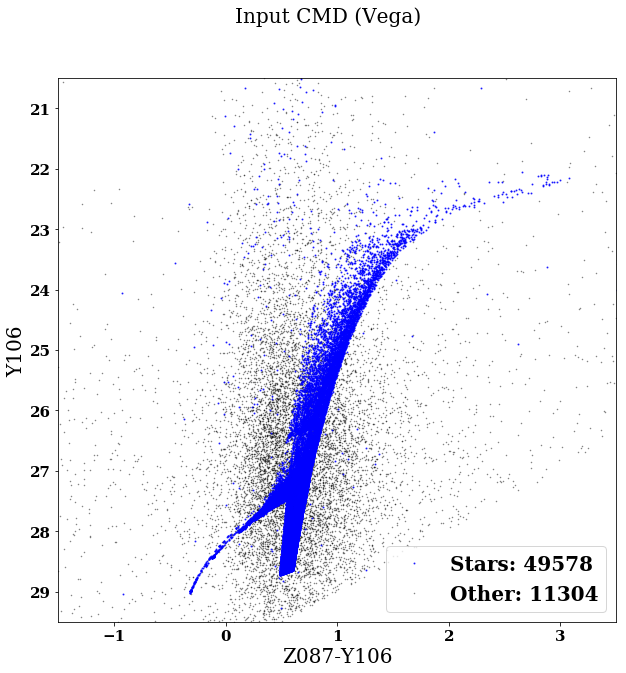

Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_Y106_full.png


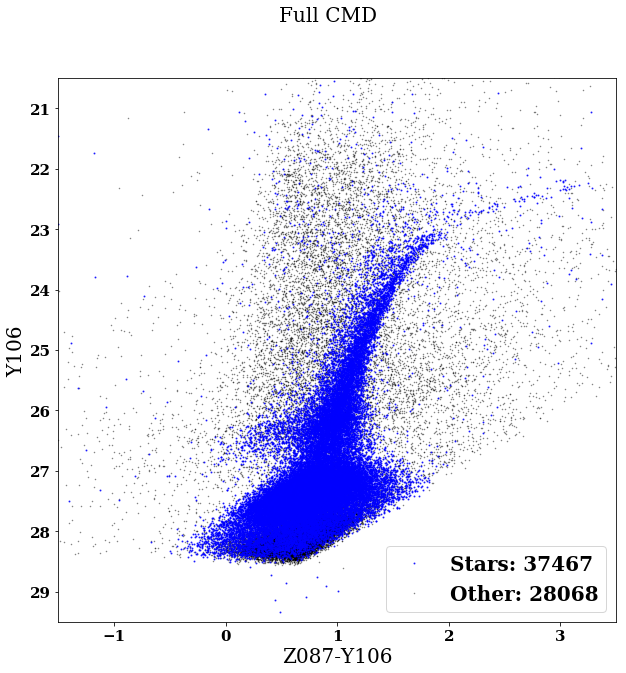

In [9]:
# Make figures for qualitative evaluation
# Example for one pair of filters

# Properly added in both filters
inPair   = input_pair(in_DF,0,1)

# Properly detected in both filters
outPair  = output_pair(out_DF,new_labels,0,1)

# Re-classify based on whether added and detected as stars
clnPair  = clean_pair(inPair,outPair)

# Show input and output data
make_plots(inPair,outPair,clnPair,\
           filt1=filters[0],filt2=filters[1],\
           opt=['input','output'],show_plot=True)


Filters Z087 and Y106:
Stars: 25493  Others: 3821
			 Writing out:  clean_cmd_Z087_Y106_clean.png


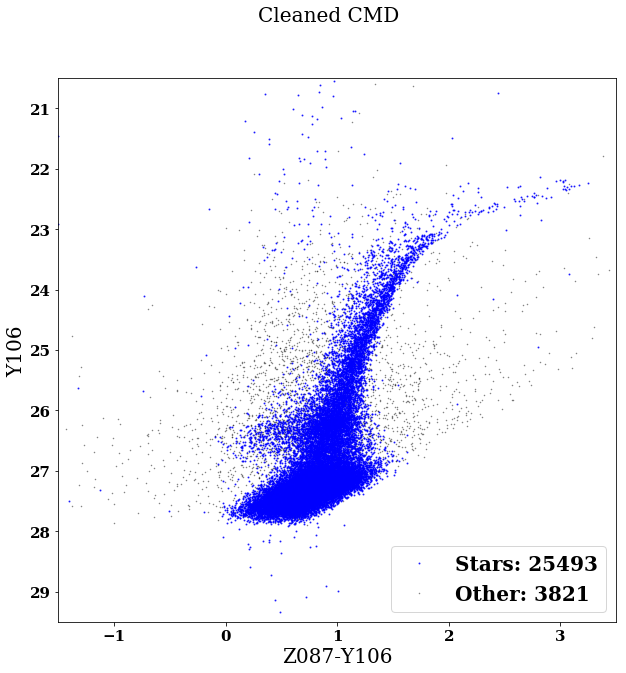

Recovery Rate:	 0.51
False Rate: 	 0.13





In [10]:
# Show re-labeled data, for qualitative evaluation
make_plots(inPair,outPair,clnPair,\
           filt1=filters[0],filt2=filters[1],\
           opt=['clean'],show_plot=True)

In [11]:
# Qualitative evaluation, for all filter pairs
makePlots(in_DF,out_DF,new_labels,show_plot=False)


Filters Z087 and Y106:
Stars: 49578  Others: 11271
			 Writing out:  input_cmd_Z087_Y106_Vega.png
Stars: 37703  Others: 27926
			 Writing out:  output_cmd_Z087_Y106_full.png
Stars: 24942  Others: 3616
			 Writing out:  clean_cmd_Z087_Y106_clean.png
Recovery Rate:	 0.50
False Rate: 	 0.13




Filters Z087 and J129:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_J129_Vega.png
Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_J129_full.png
Stars: 25493  Others: 3821
			 Writing out:  clean_cmd_Z087_J129_clean.png
Recovery Rate:	 0.51
False Rate: 	 0.13




Filters Z087 and H158:
Stars: 49579  Others: 11320
			 Writing out:  input_cmd_Z087_H158_Vega.png
Stars: 36749  Others: 28669
			 Writing out:  output_cmd_Z087_H158_full.png
Stars: 23435  Others: 3251
			 Writing out:  clean_cmd_Z087_H158_clean.png
Recovery Rate:	 0.47
False Rate: 	 0.12




Filters Z087 and F184:
Stars: 49579  Others: 11341
			 Writing out:  input_cmd_Z087_F184_Vega.png
Stars: 31665  Others: 


Filters Z087 and Y106:
Stars: 49578  Others: 11271
			 Writing out:  input_cmd_Z087_Y106_Vega.png


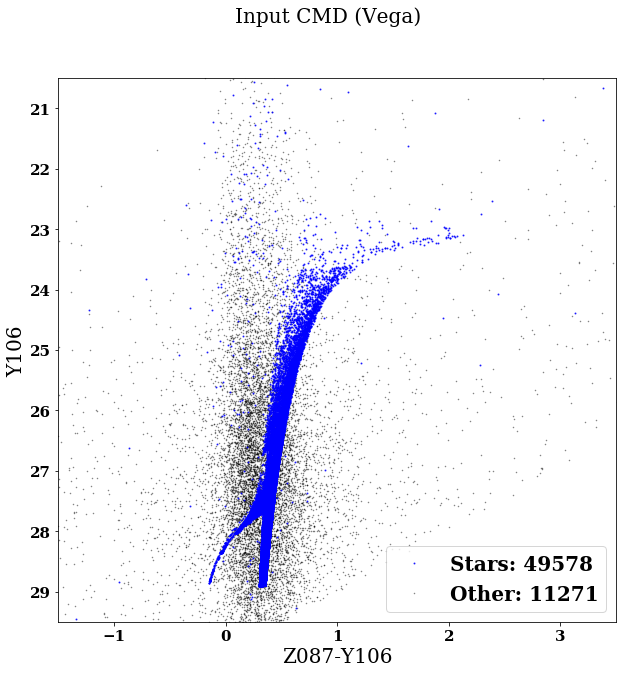

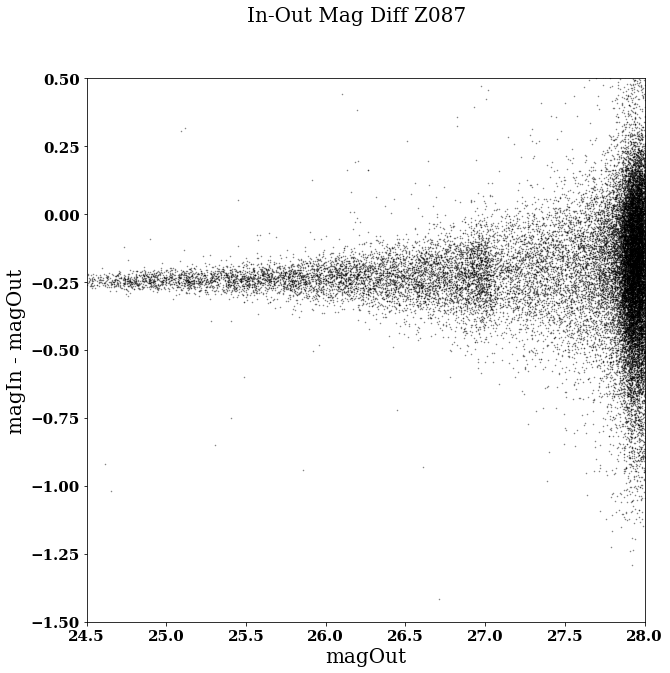

Stars: 37703  Others: 27926
			 Writing out:  output_cmd_Z087_Y106_full.png


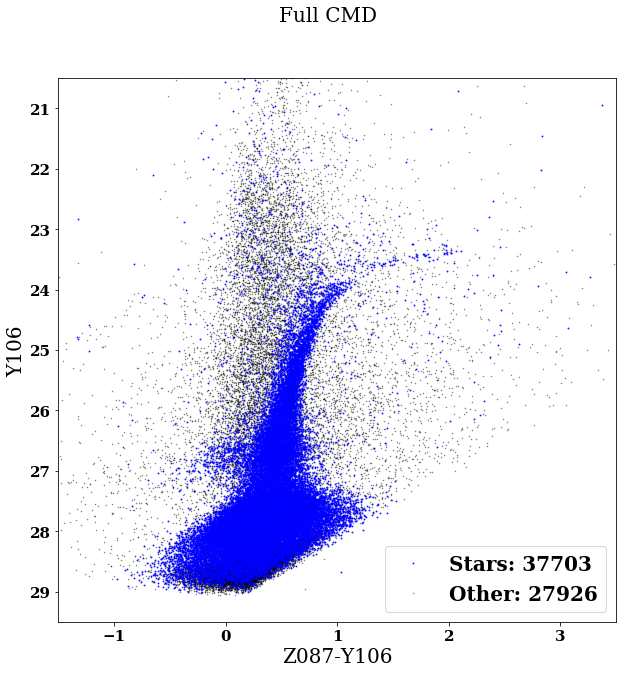

Stars: 24942  Others: 3616
			 Writing out:  clean_cmd_Z087_Y106_clean.png


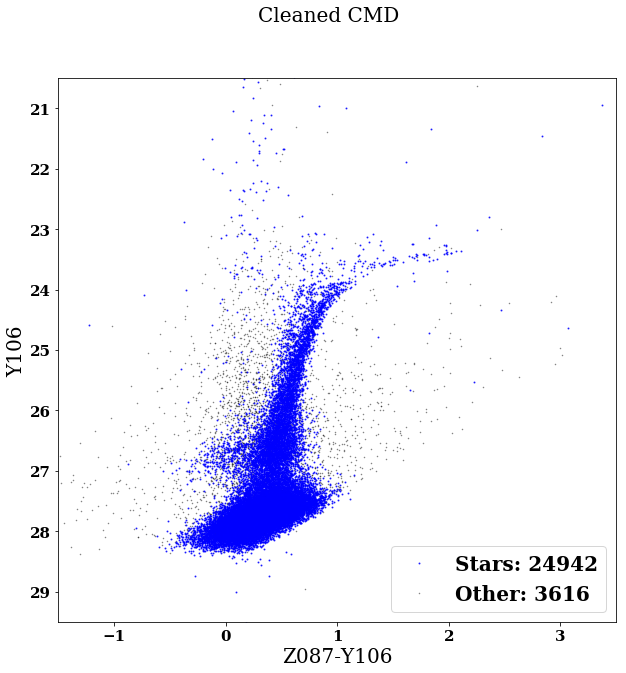

Recovery Rate:	 0.50
False Rate: 	 0.13




Filters Z087 and J129:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_J129_Vega.png


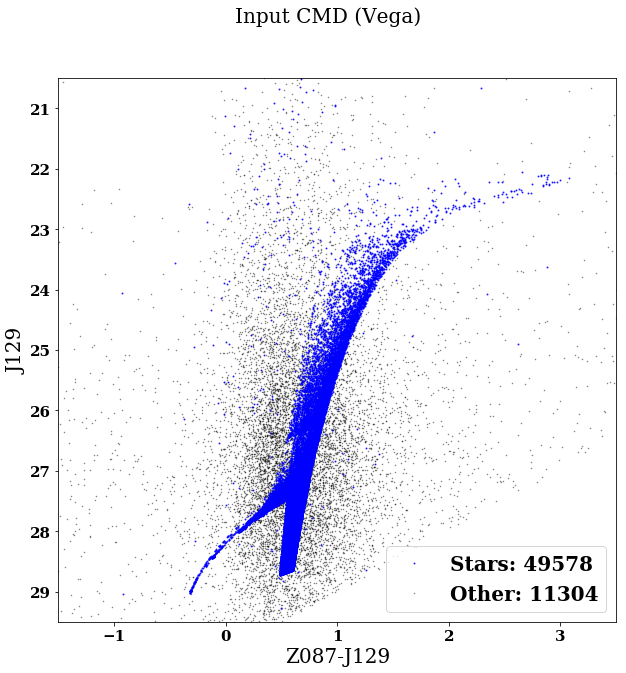

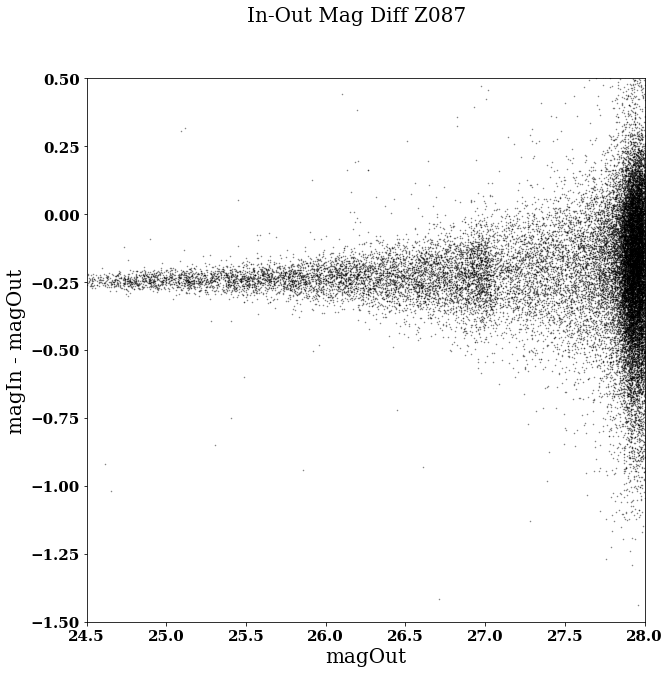

Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_J129_full.png


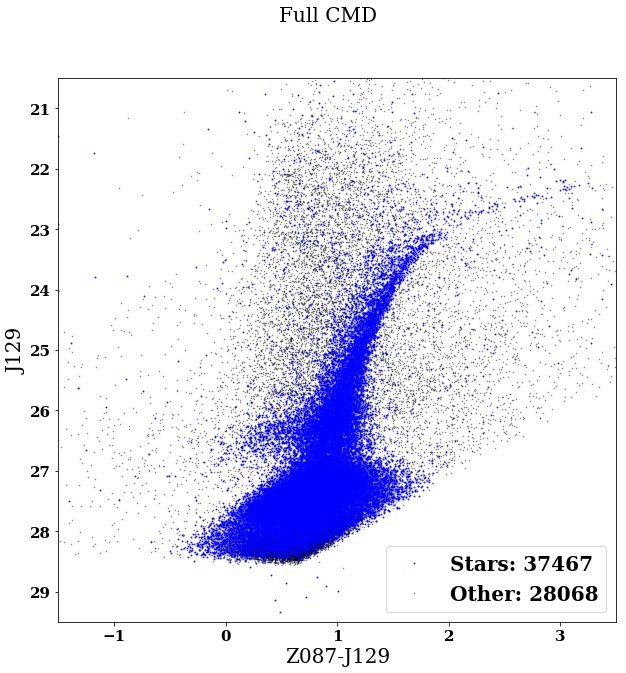

Stars: 25493  Others: 3821
			 Writing out:  clean_cmd_Z087_J129_clean.png


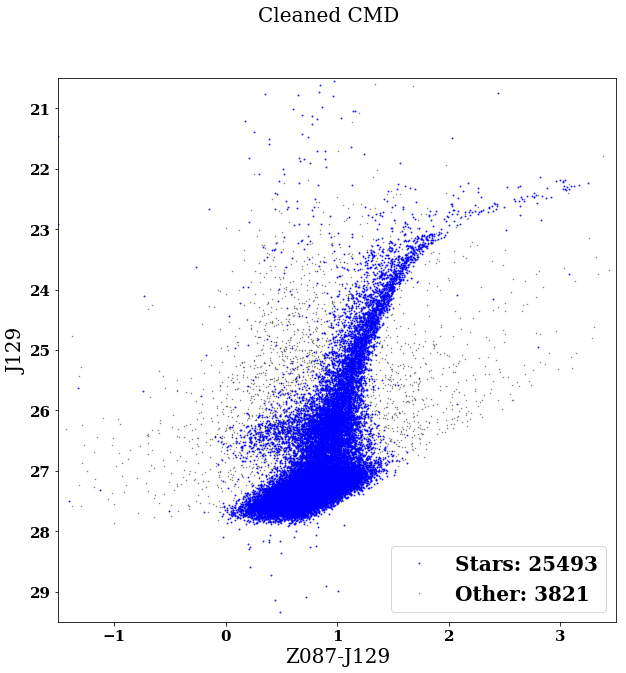

Recovery Rate:	 0.51
False Rate: 	 0.13




Filters Z087 and H158:
Stars: 49579  Others: 11320
			 Writing out:  input_cmd_Z087_H158_Vega.png


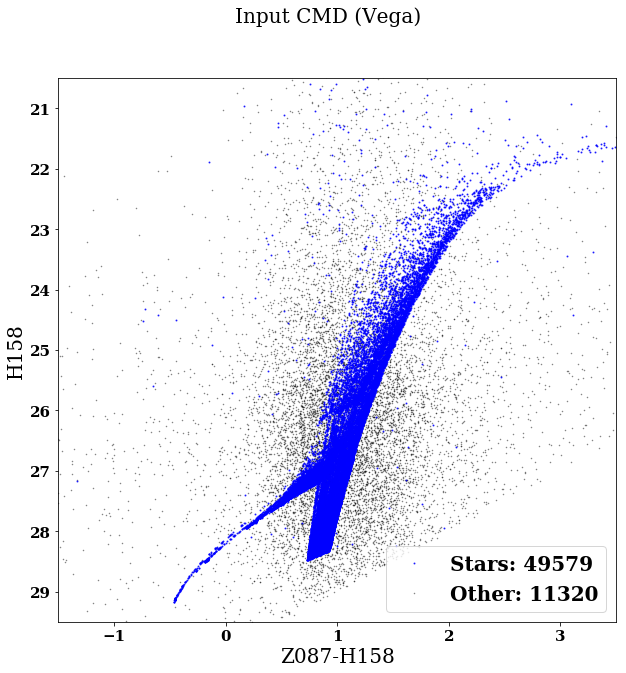

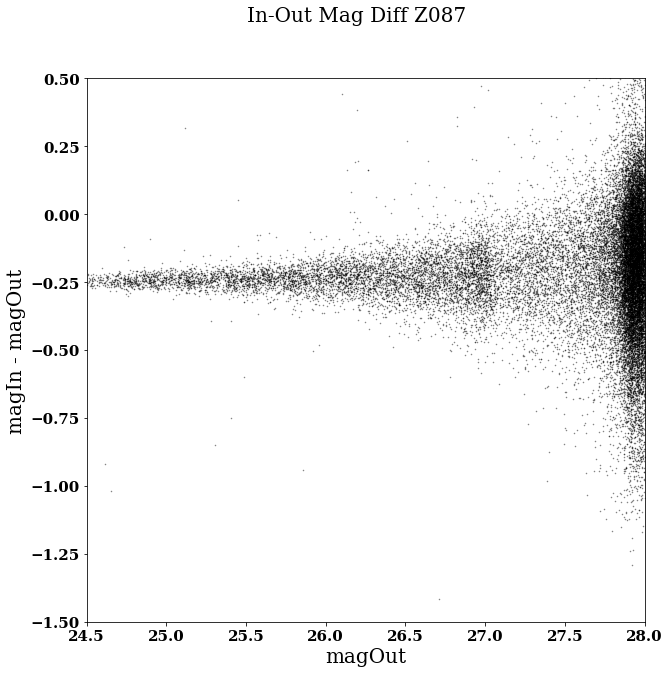

Stars: 36749  Others: 28669
			 Writing out:  output_cmd_Z087_H158_full.png


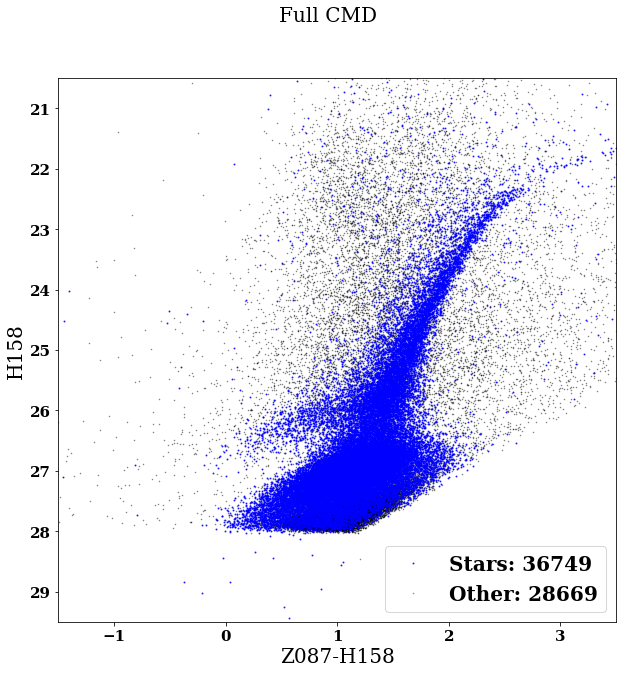

Stars: 23435  Others: 3251
			 Writing out:  clean_cmd_Z087_H158_clean.png


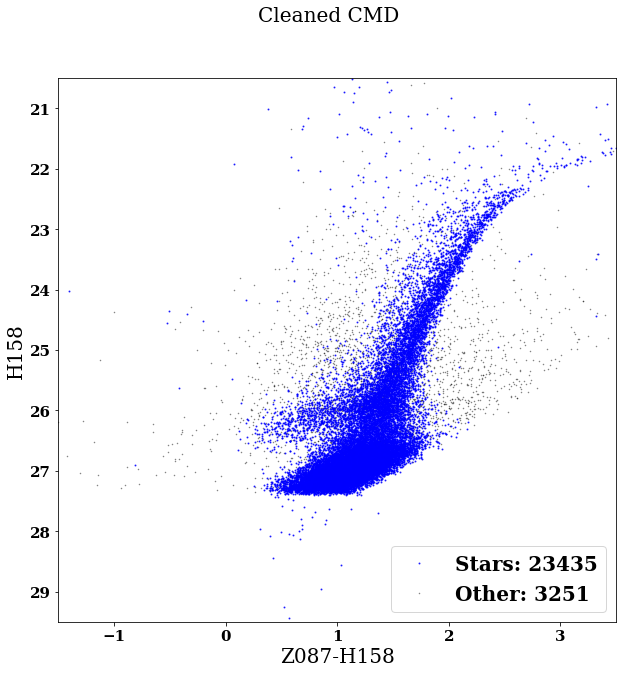

Recovery Rate:	 0.47
False Rate: 	 0.12




Filters Z087 and F184:
Stars: 49579  Others: 11341
			 Writing out:  input_cmd_Z087_F184_Vega.png


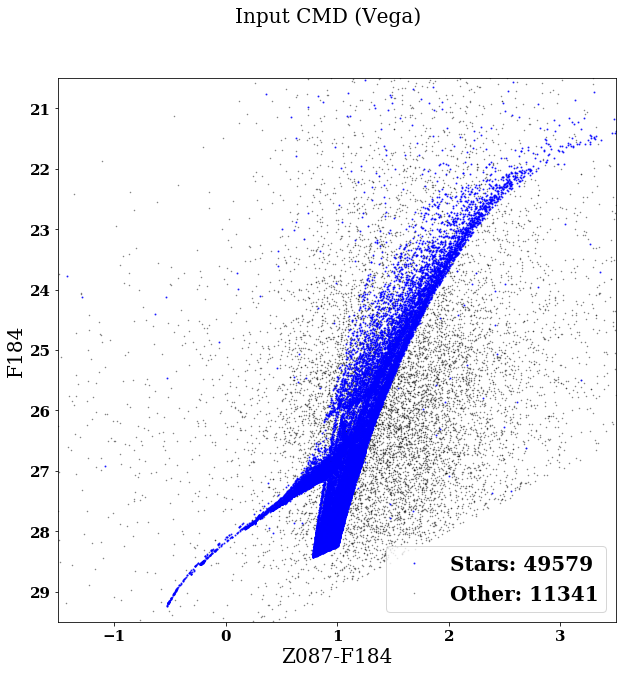

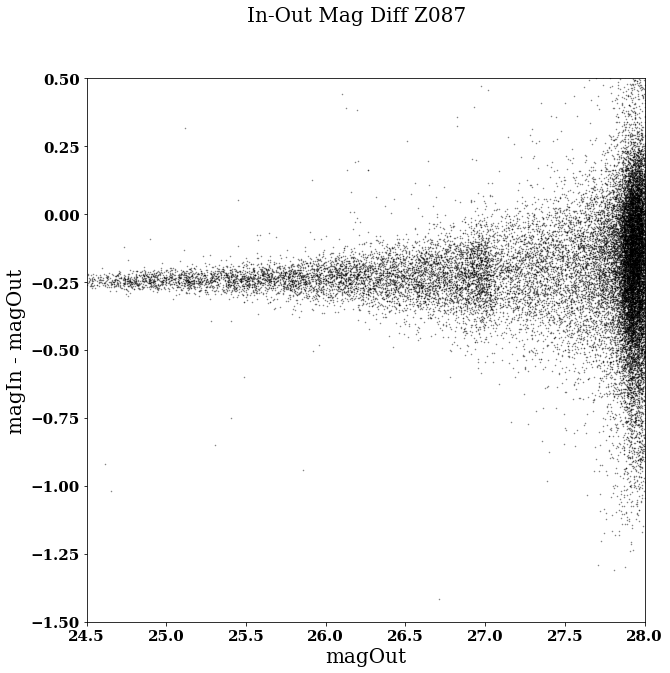

Stars: 31665  Others: 29460
			 Writing out:  output_cmd_Z087_F184_full.png


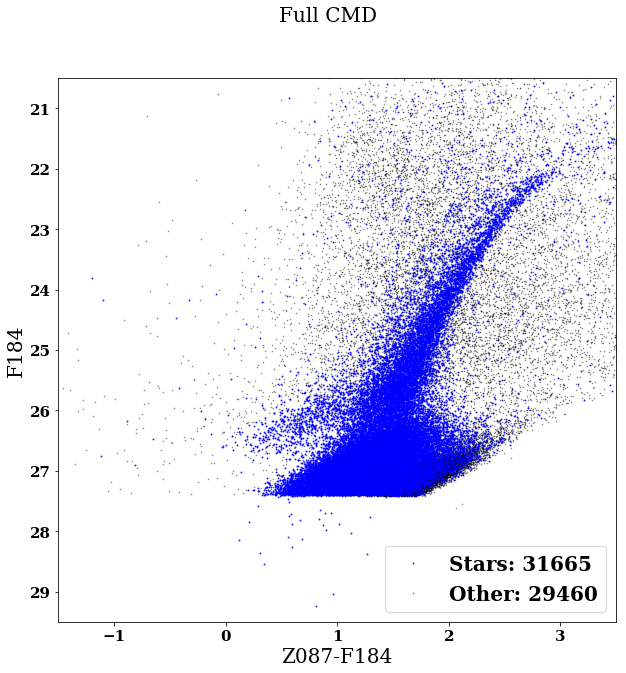

Stars: 16008  Others: 2417
			 Writing out:  clean_cmd_Z087_F184_clean.png


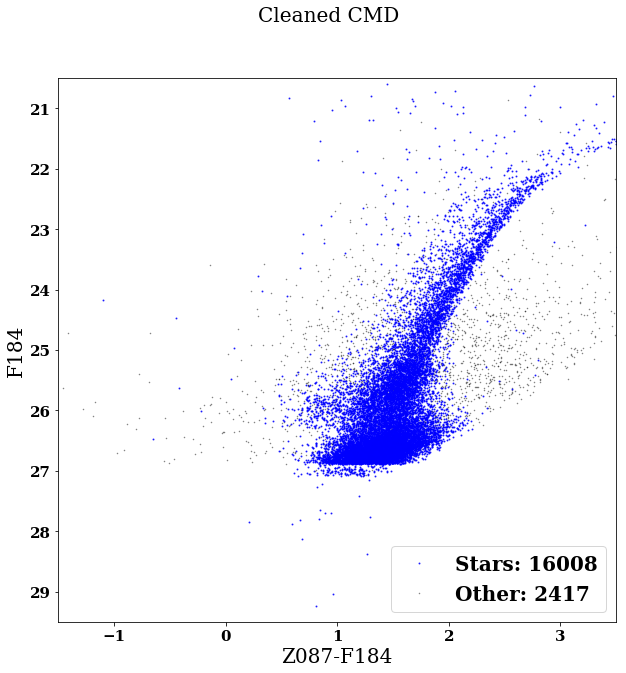

Recovery Rate:	 0.32
False Rate: 	 0.13




Filters Y106 and J129:
Stars: 49712  Others: 11724
			 Writing out:  input_cmd_Y106_J129_Vega.png


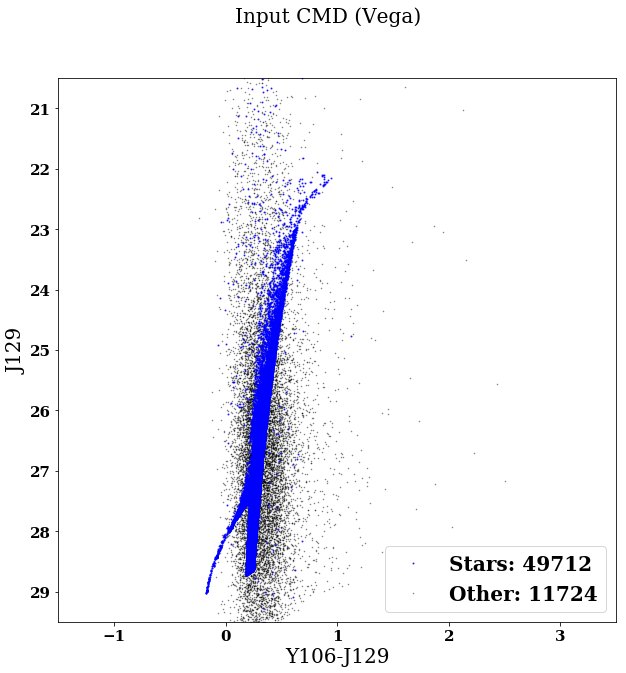

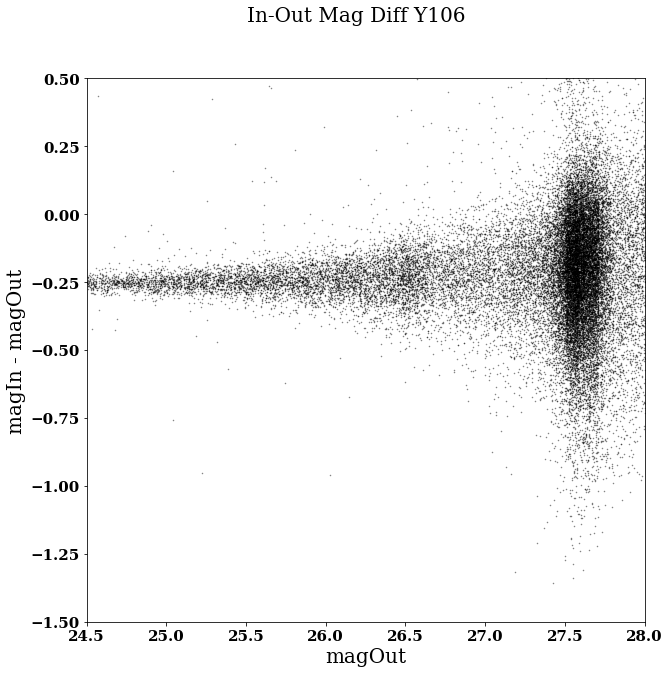

Stars: 38392  Others: 31249
			 Writing out:  output_cmd_Y106_J129_full.png


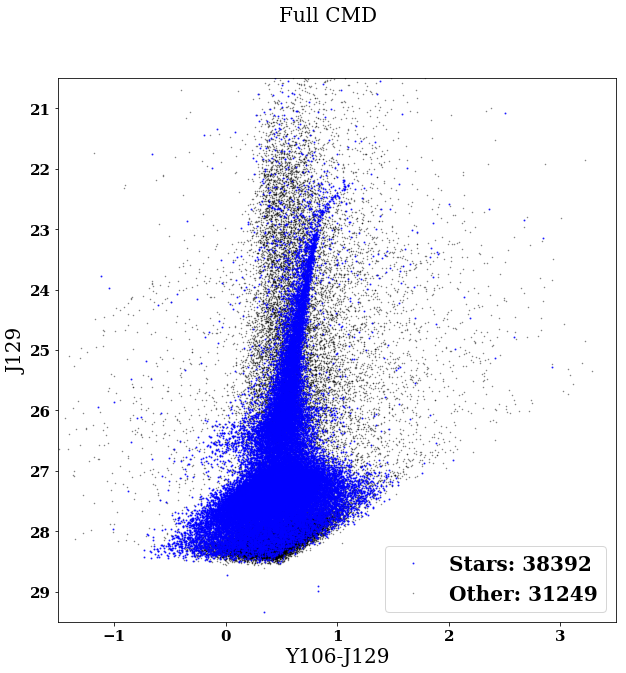

Stars: 25543  Others: 4158
			 Writing out:  clean_cmd_Y106_J129_clean.png


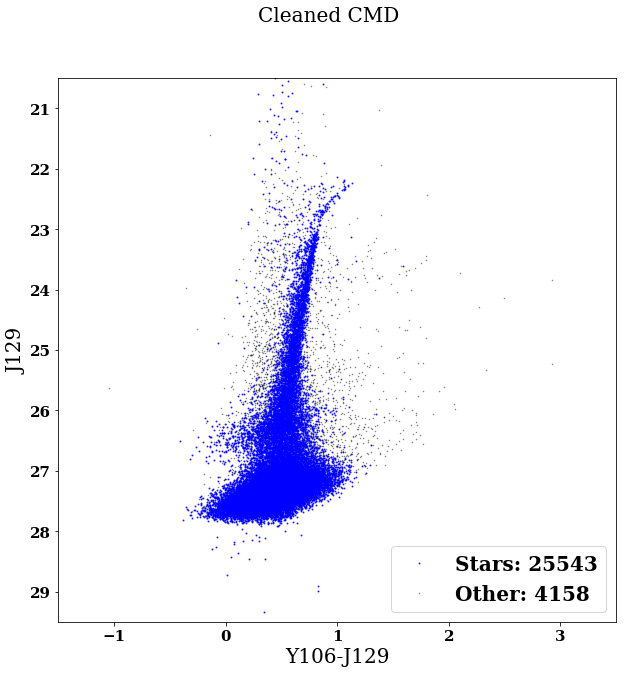

Recovery Rate:	 0.51
False Rate: 	 0.14




Filters Y106 and H158:
Stars: 49712  Others: 11633
			 Writing out:  input_cmd_Y106_H158_Vega.png


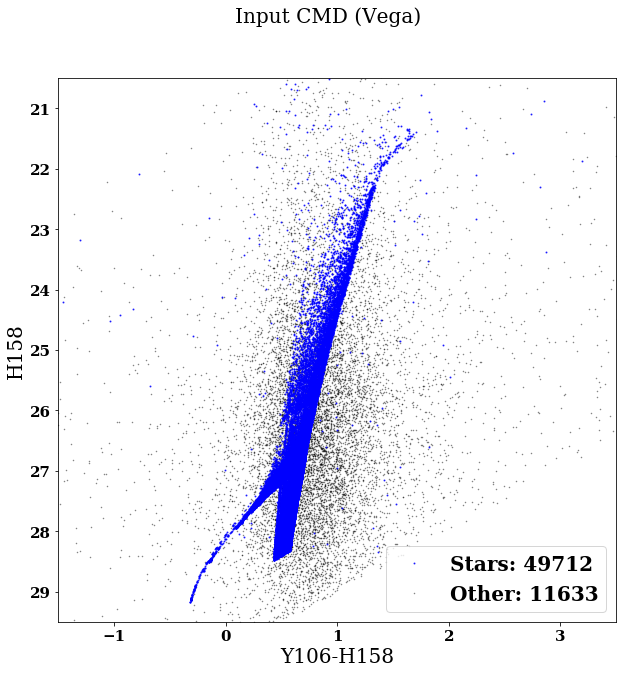

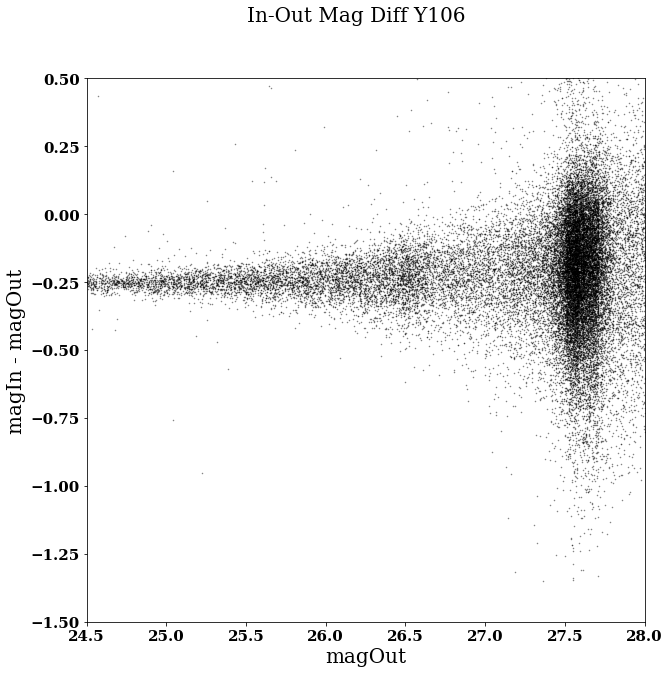

Stars: 37533  Others: 30565
			 Writing out:  output_cmd_Y106_H158_full.png


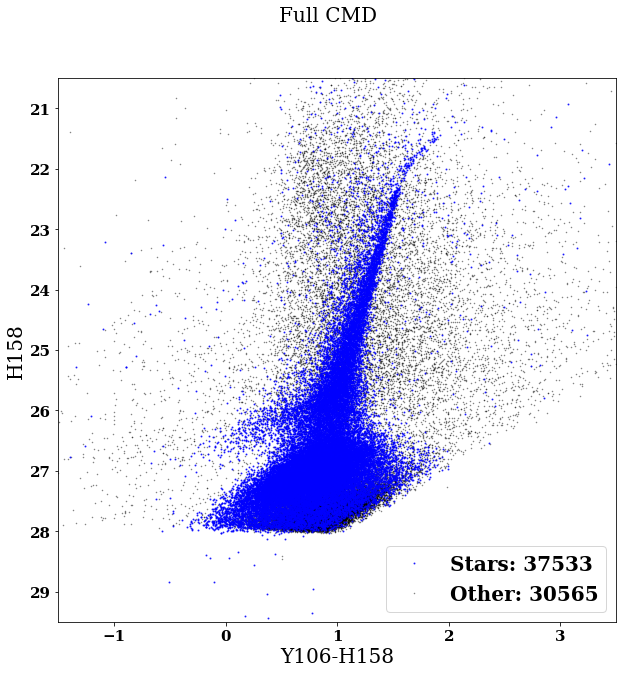

Stars: 23434  Others: 3284
			 Writing out:  clean_cmd_Y106_H158_clean.png


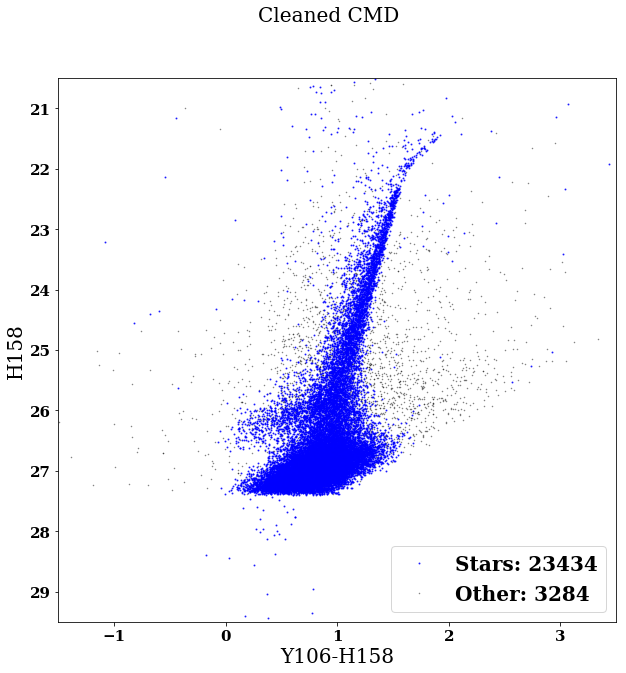

Recovery Rate:	 0.47
False Rate: 	 0.12




Filters Y106 and F184:
Stars: 49712  Others: 11648
			 Writing out:  input_cmd_Y106_F184_Vega.png


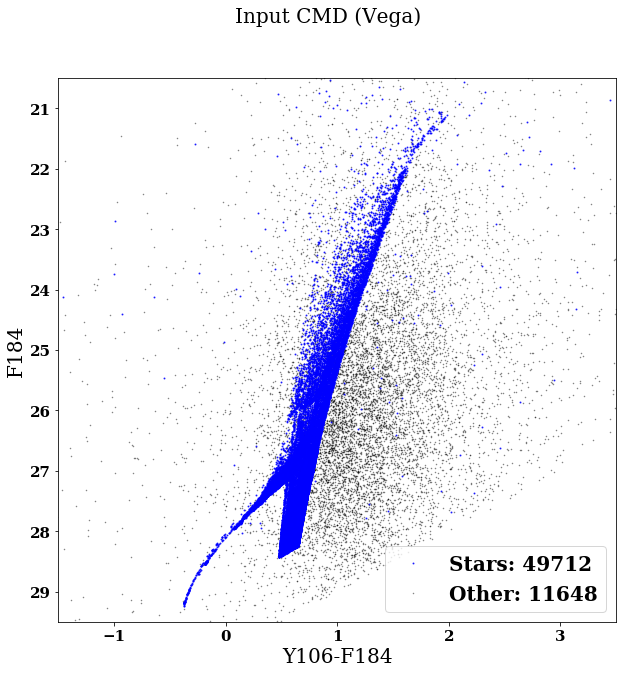

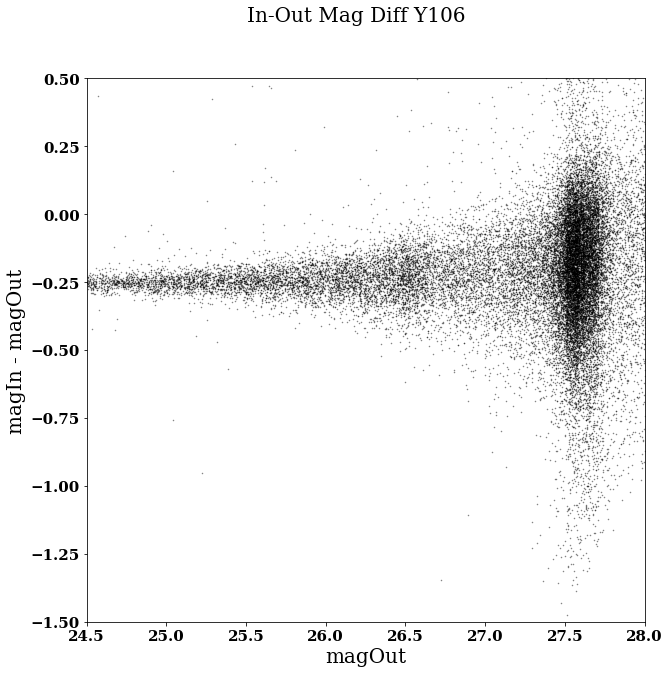

Stars: 32104  Others: 31915
			 Writing out:  output_cmd_Y106_F184_full.png


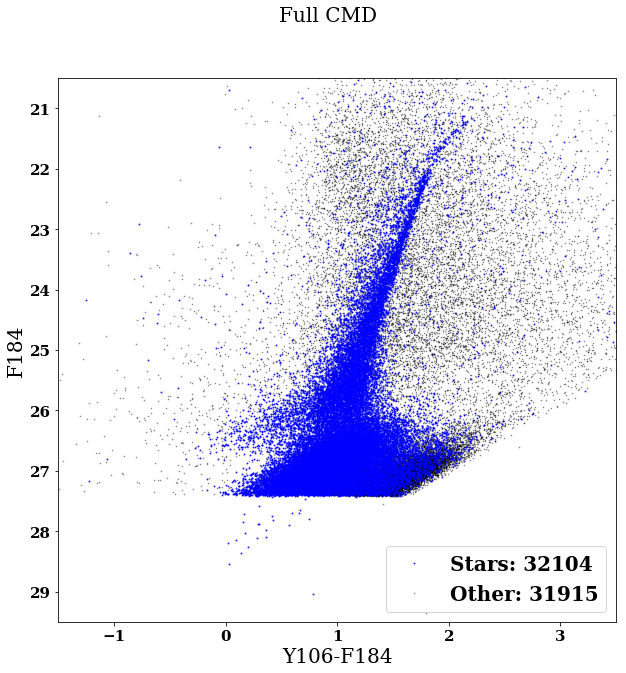

Stars: 14950  Others: 2295
			 Writing out:  clean_cmd_Y106_F184_clean.png


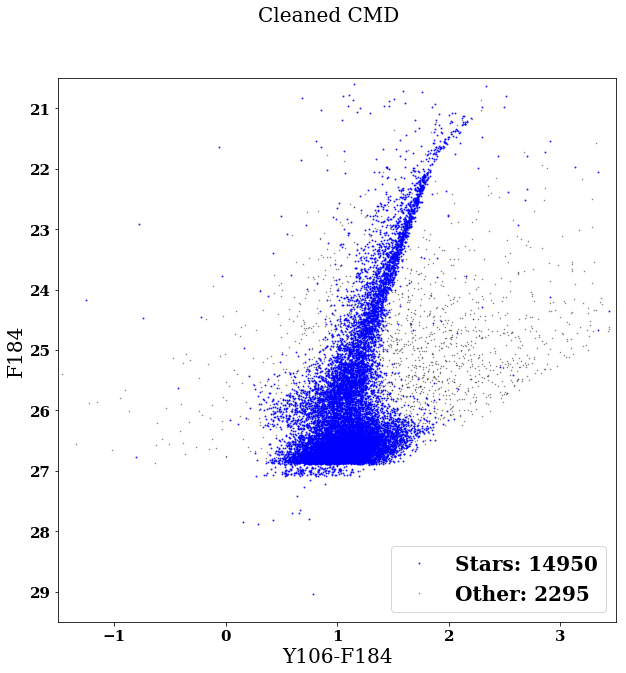

Recovery Rate:	 0.30
False Rate: 	 0.13




Filters J129 and H158:
Stars: 49902  Others: 11853
			 Writing out:  input_cmd_J129_H158_Vega.png


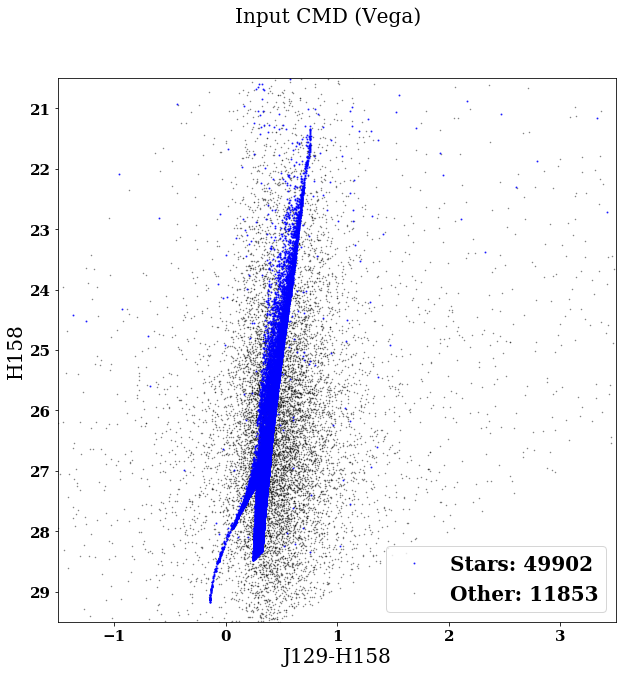

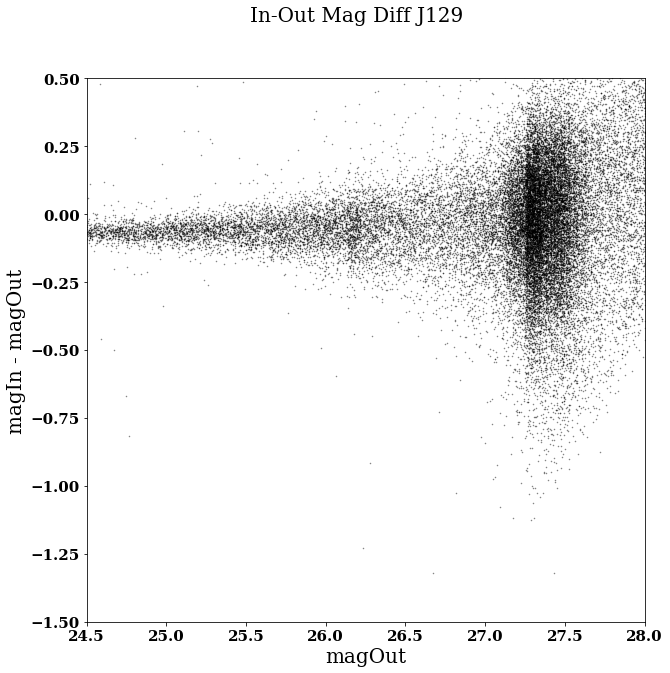

Stars: 37522  Others: 32686
			 Writing out:  output_cmd_J129_H158_full.png


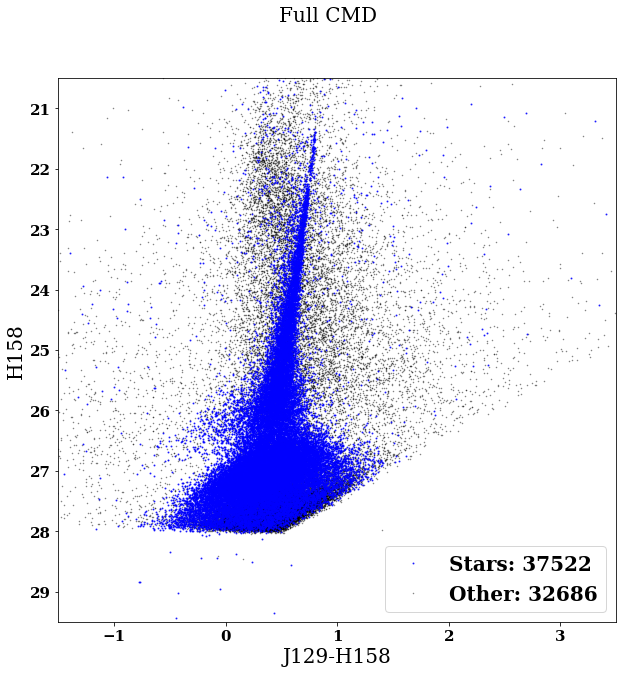

Stars: 24273  Others: 3859
			 Writing out:  clean_cmd_J129_H158_clean.png


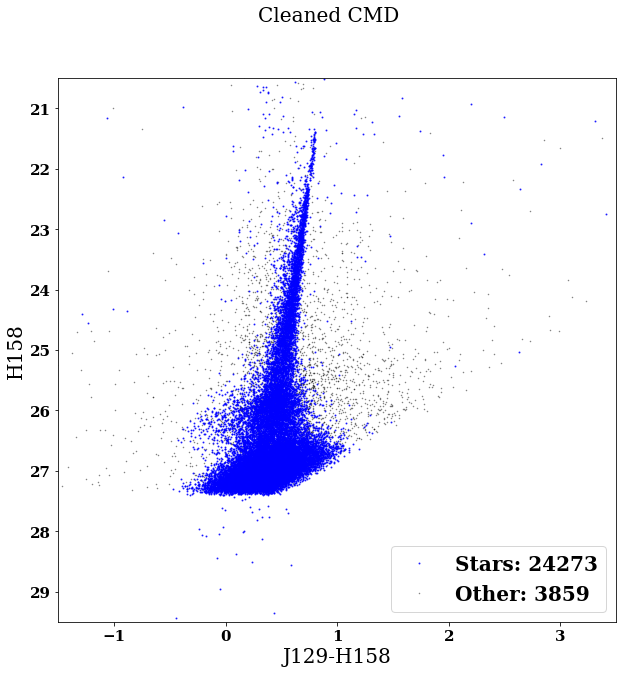

Recovery Rate:	 0.49
False Rate: 	 0.14




Filters J129 and F184:
Stars: 49902  Others: 11868
			 Writing out:  input_cmd_J129_F184_Vega.png


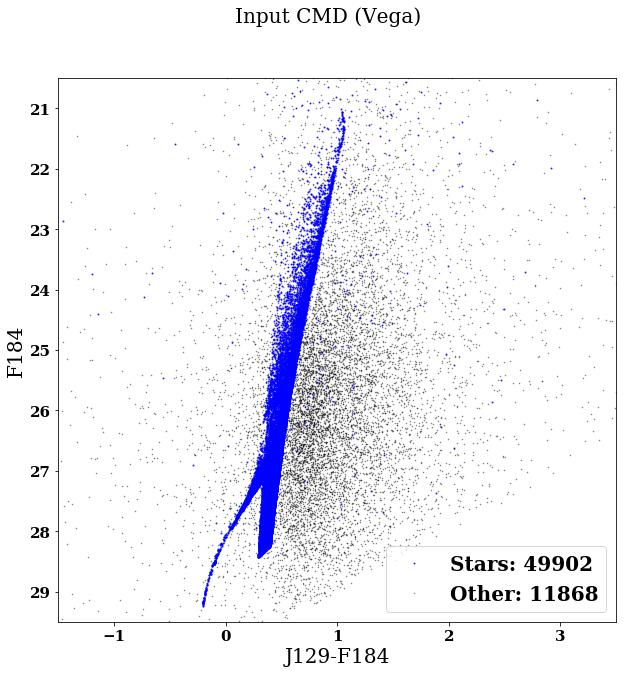

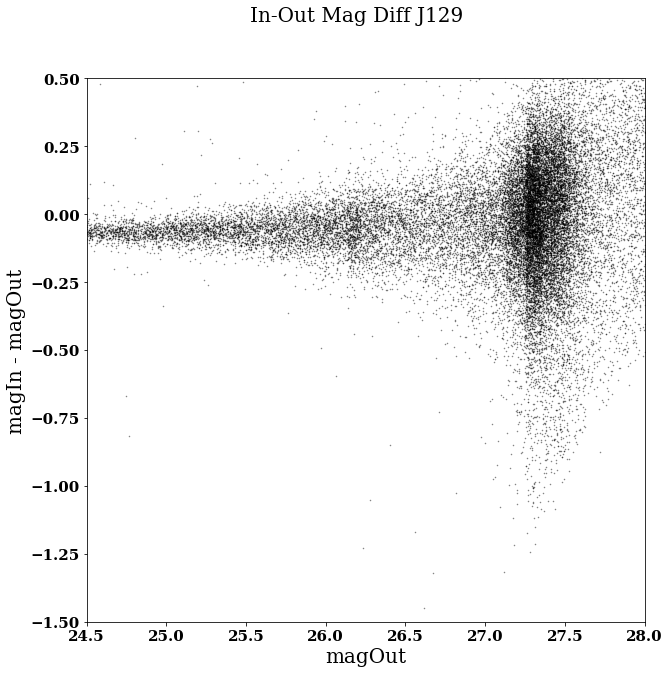

Stars: 32208  Others: 33871
			 Writing out:  output_cmd_J129_F184_full.png


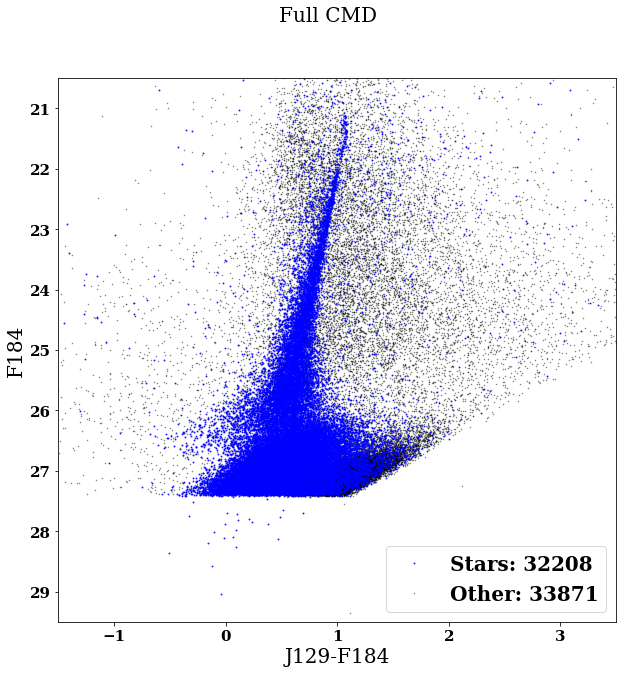

Stars: 16078  Others: 2823
			 Writing out:  clean_cmd_J129_F184_clean.png


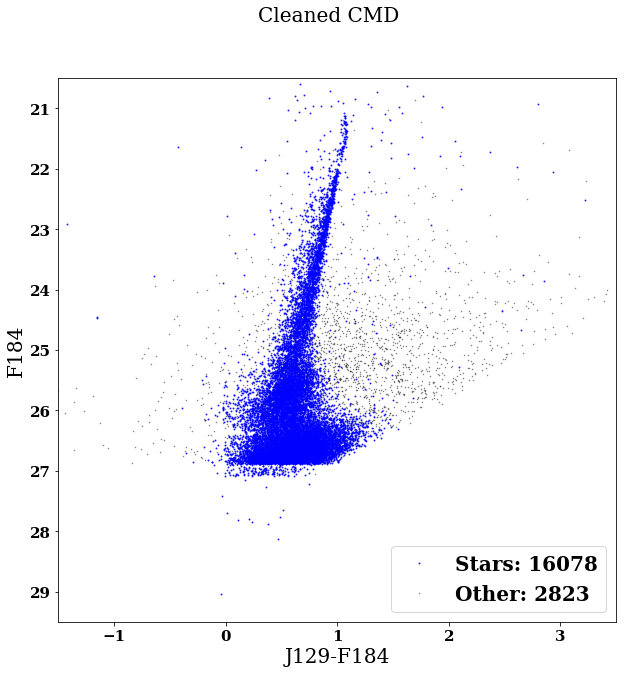

Recovery Rate:	 0.32
False Rate: 	 0.15




Filters H158 and F184:
Stars: 50088  Others: 12178
			 Writing out:  input_cmd_H158_F184_Vega.png


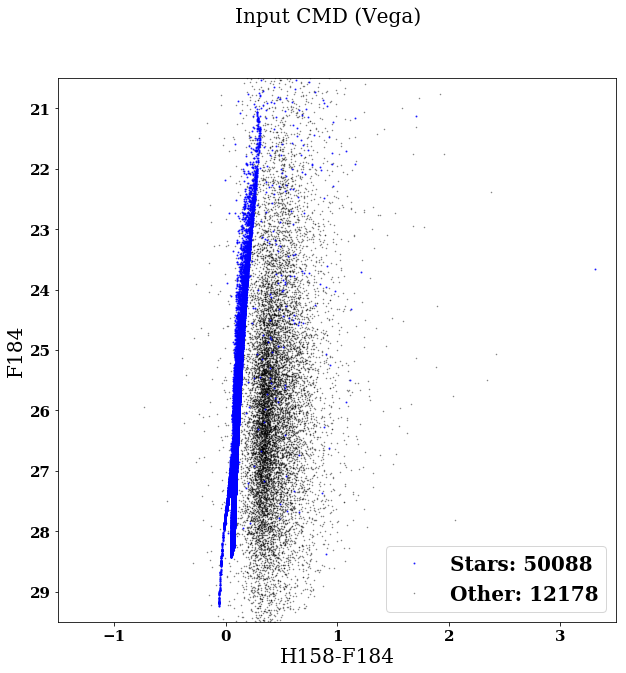

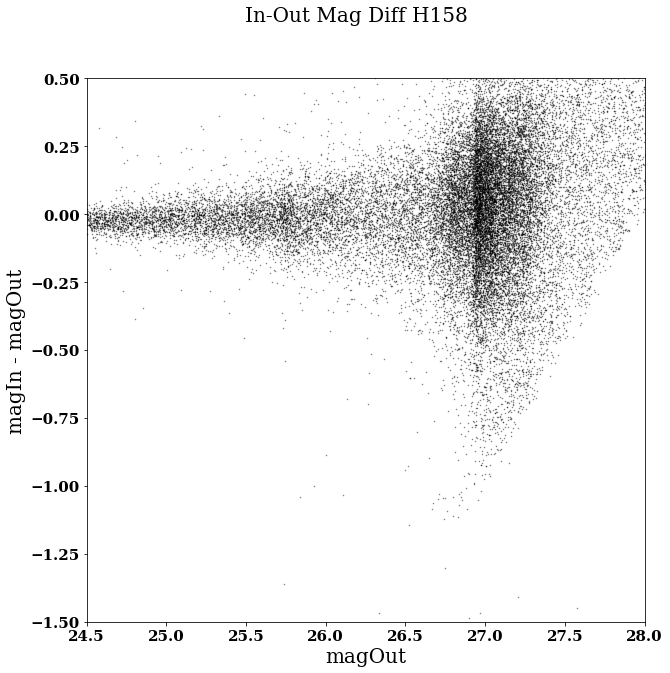

Stars: 32154  Others: 38342
			 Writing out:  output_cmd_H158_F184_full.png


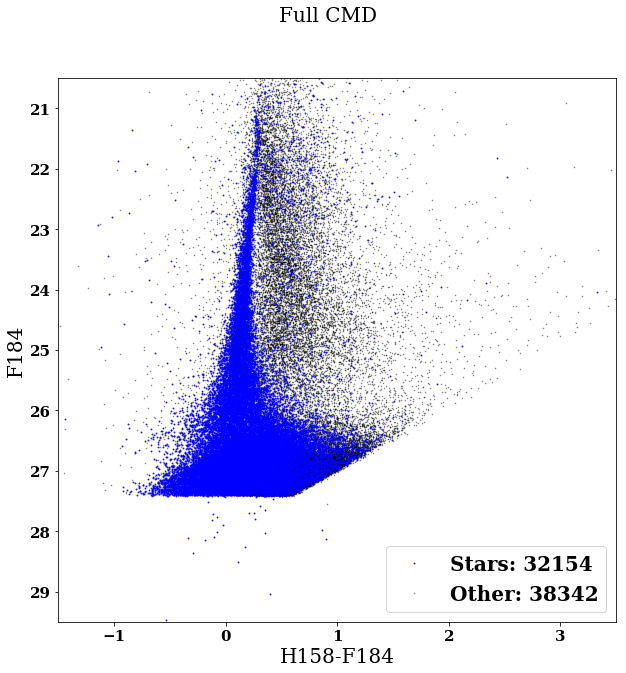

Stars: 15675  Others: 3315
			 Writing out:  clean_cmd_H158_F184_clean.png


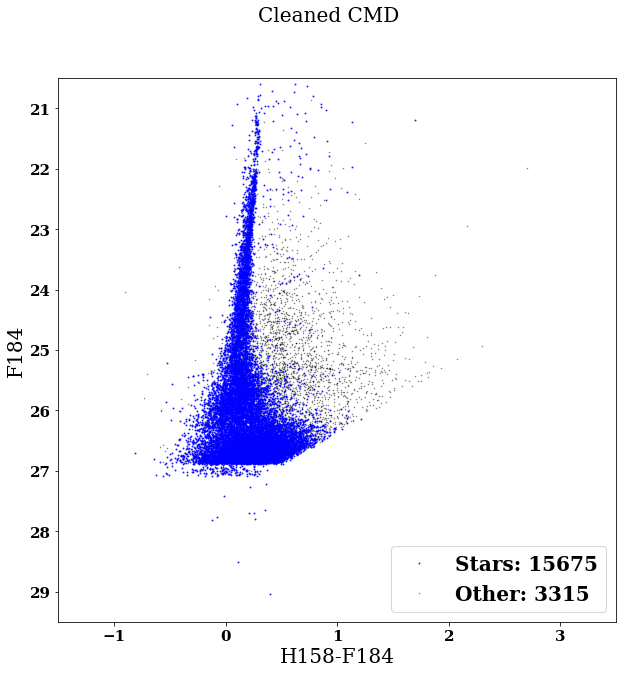

Recovery Rate:	 0.31
False Rate: 	 0.17







In [12]:
# Figures for all filter pairs
makePlots(in_DF,out_DF,new_labels,show_plot=True)